<a href="https://colab.research.google.com/github/tiwaryanurag/creditCardFraud/blob/main/creditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Raj Aryan**

**CodSoft**

**Credit Card Fraud Detection System**

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
# getting the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292950 entries, 0 to 1292949
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1292950 non-null  int64  
 1   trans_date_trans_time  1292950 non-null  object 
 2   cc_num                 1292950 non-null  int64  
 3   merchant               1292949 non-null  object 
 4   category               1292949 non-null  object 
 5   amt                    1292949 non-null  float64
 6   first                  1292949 non-null  object 
 7   last                   1292949 non-null  object 
 8   gender                 1292949 non-null  object 
 9   street                 1292949 non-null  object 
 10  city                   1292949 non-null  object 
 11  state                  1292949 non-null  object 
 12  zip                    1292949 non-null  float64
 13  lat                    1292949 non-null  float64
 14  long              

In [ ]:
# Checking the null values
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,1
category,1
amt,1
first,1
last,1
gender,1
street,1


In [ ]:
# finding the DOB's
df["dob"] = pd.to_datetime(df["dob"])
today = pd.Timestamp('today')
df['age'] = today.year - df['dob'].dt.year
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,36.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,46.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,62.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,57.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,38.0


In [ ]:
# dropping the irrelevent columns
df.drop(columns=['Unnamed: 0','trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)

In [ ]:
print("Normal Transactions count(%) :",(df['is_fraud'].value_counts()[0]/df.shape[0])*100,'%')
print("Fraud Transactions count(%)  :",(df['is_fraud'].value_counts()[1]/df.shape[0])*100,'%')

Normal Transactions count(%) : 99.42201941297034 %
Fraud Transactions count(%)  : 0.5779032445183495 %


In [ ]:
# description of the datset
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud,age
count,1.292950e+06,1.292949e+06,1.292949e+06,1.292949e+06,1.292949e+06,1.292949e+06,1.292949e+06,1.292949e+06,1.292949e+06
mean,4.171322e+17,7.033917e+01,4.880049e+04,3.853799e+01,-9.022591e+01,8.883419e+04,1.349179e+09,5.779037e-03,5.073894e+01
std,1.308719e+18,1.603841e+02,2.689336e+04,5.075284e+00,1.375791e+01,3.019633e+05,1.280269e+07,7.580003e-02,1.737860e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,0.000000e+00,1.900000e+01
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.338733e+09,0.000000e+00,3.700000e+01
50%,3.521417e+15,4.749000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349160e+09,0.000000e+00,4.900000e+01
75%,4.642255e+15,8.311000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359252e+09,0.000000e+00,6.200000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371686e+09,1.000000e+00,1.000000e+02


In [ ]:
# getting unique values by column wise
def unique(columns):
  for col in columns:
    print('Column Name :',col)
    print('Unique Values :',int(df[f'{col}'].nunique()))
    print('=============================================================================')

In [ ]:
unique(list(df.columns))

Column Name : cc_num
Unique Values : 984
Column Name : merchant
Unique Values : 693
Column Name : category
Unique Values : 14
Column Name : amt
Unique Values : 52863
Column Name : first
Unique Values : 352
Column Name : last
Unique Values : 481
Column Name : gender
Unique Values : 2
Column Name : street
Unique Values : 983
Column Name : city
Unique Values : 894
Column Name : state
Unique Values : 51
Column Name : zip
Unique Values : 970
Column Name : lat
Unique Values : 968
Column Name : long
Unique Values : 969
Column Name : city_pop
Unique Values : 879
Column Name : job
Unique Values : 494
Column Name : unix_time
Unique Values : 1271152
Column Name : is_fraud
Unique Values : 2
Column Name : age
Unique Values : 81


In [ ]:
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [ ]:
encoder = LabelEncoder()
for col in cat_var:
  df[f'{col}'] = encoder.fit_transform(df[f'{col}'])

In [ ]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud,age
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,265,36.0788,-81.1781,3495.0,370,1.325376e+09,0.0,36.0
1,630423337322,241,4,107.23,309,157,0,435,612,47,965,48.8878,-118.2105,149.0,428,1.325376e+09,0.0,46.0
2,38859492057661,390,0,220.11,115,381,1,602,468,13,858,42.1808,-112.2620,4154.0,307,1.325376e+09,0.0,62.0
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,614,46.2306,-112.1138,1939.0,328,1.325376e+09,0.0,57.0
4,375534208663984,297,9,41.96,336,149,1,418,216,45,231,38.4207,-79.4629,99.0,116,1.325376e+09,0.0,38.0


In [ ]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [ ]:
df = df.dropna(subset=['is_fraud'])

In [ ]:
# Check for missing values in 'y'
if y.isnull().any():
  print(f"Missing values found in 'y': {y.isnull().sum()}")
  # Handle missing values (e.g., drop rows or impute)
  df = df.dropna(subset=['is_fraud'])  # Or use an imputation method
  # Recreate 'y' after handling missing values in 'df'
  y = df['is_fraud'] #This will ensure that y is updated and doesn't contain NaN values
else:
  print("No missing values in 'y'")

# using smote oversampling method
smote = SMOTE(
    sampling_strategy='auto',
    random_state = 0,
    k_neighbors = 2
)
x_res,y_res = smote.fit_resample(X,y)

No missing values in 'y'


In [ ]:
data = pd.concat([x_res,y_res],axis=1)
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,is_fraud
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,265,36.0788,-81.1781,3495.0,370,1.325376e+09,36.0,0.0
1,630423337322,241,4,107.23,309,157,0,435,612,47,965,48.8878,-118.2105,149.0,428,1.325376e+09,46.0,0.0
2,38859492057661,390,0,220.11,115,381,1,602,468,13,858,42.1808,-112.2620,4154.0,307,1.325376e+09,62.0,0.0
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,614,46.2306,-112.1138,1939.0,328,1.325376e+09,57.0,0.0
4,375534208663984,297,9,41.96,336,149,1,418,216,45,231,38.4207,-79.4629,99.0,116,1.325376e+09,38.0,0.0


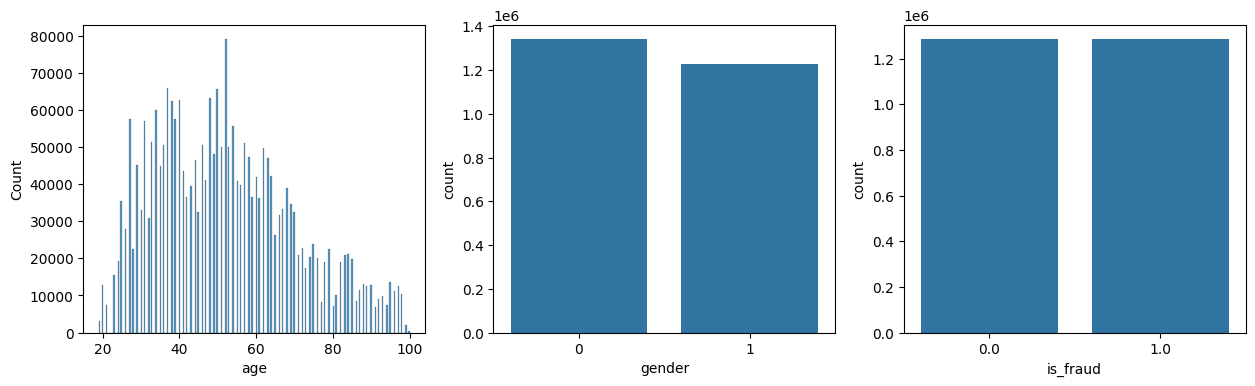

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
sns.histplot(data,x='age',ax=ax[0])
sns.countplot(data,x='gender',ax=ax[1])
sns.countplot(data,x='is_fraud',ax=ax[2])
plt.show()

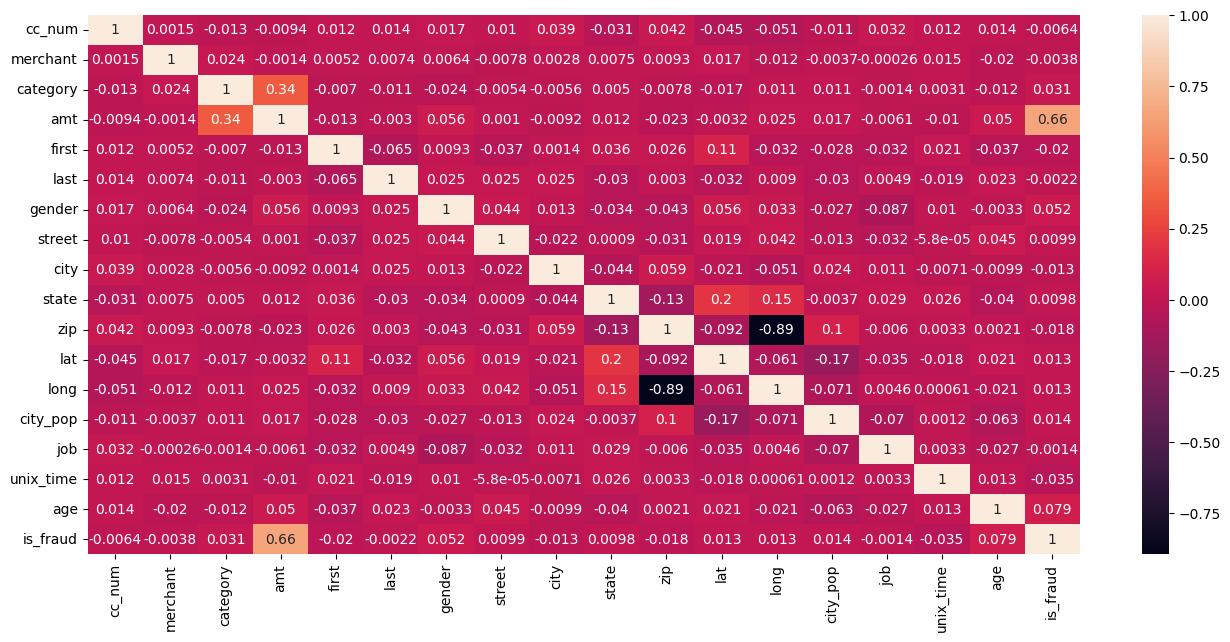

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(1,1,figsize=(16,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Removing unwanted columns identified from above heatmap
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)
data.head()

,category,amt,gender,city,zip,age,is_fraud
0,8,4.97,0,526,265,36.0,0.0
1,4,107.23,0,612,965,46.0,0.0
2,0,220.11,1,468,858,62.0,0.0
3,2,45.00,1,84,614,57.0,0.0
4,9,41.96,1,216,231,38.0,0.0


In [ ]:
# Features and target spliting
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [ ]:
# spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training sample size :",X_train.shape)
print("Test sample size :",X_test.shape)

Training sample size : (2056763, 6)
Test sample size : (514191, 6)


In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print("Training set accuracy :",model_lr.score(X_train,y_train))
print("Test set accuracy :",model_lr.score(X_test,y_test))

Training set accuracy : 0.8840673427127967
Test set accuracy : 0.8840975435198205


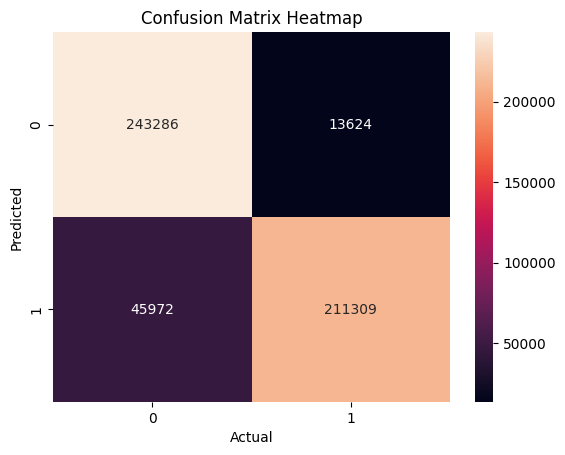

In [ ]:
    # Confusion Matrix
    y_pred = model_lr.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89    256910
         1.0       0.94      0.82      0.88    257281

    accuracy                           0.88    514191
   macro avg       0.89      0.88      0.88    514191
weighted avg       0.89      0.88      0.88    514191



In [ ]:
model_dtc = DecisionTreeClassifier(max_depth=20)
model_dtc.fit(X_train,y_train)
print('Training set Score :',model_dtc.score(X_train,y_train))
print('Test set Score :',model_dtc.score(X_test,y_test))

Training set Score : 0.9707885643605997
Test set Score : 0.9604291012483688


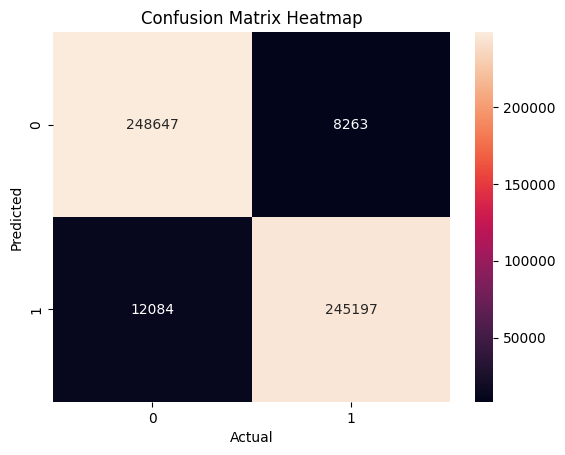

In [ ]:
# Confusion Matrix
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    256910
         1.0       0.97      0.95      0.96    257281

    accuracy                           0.96    514191
   macro avg       0.96      0.96      0.96    514191
weighted avg       0.96      0.96      0.96    514191



In [ ]:
model_rfc = RandomForestClassifier(n_estimators=20,max_depth=20)
model_rfc.fit(X_train,y_train)
print('Training set Score :',model_rfc.score(X_train,y_train))
print('Test set Score :',model_rfc.score(X_test,y_test))

Training set Score : 0.9721931987302378
Test set Score : 0.9646726605483177


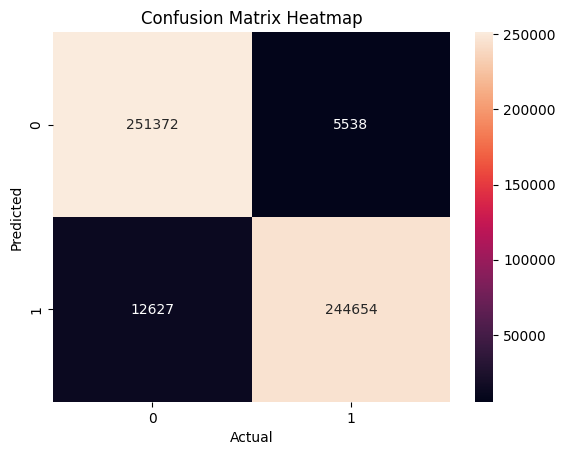

In [ ]:
# Confusion Matrix
y_pred = model_rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97    256910
         1.0       0.98      0.95      0.96    257281

    accuracy                           0.96    514191
   macro avg       0.97      0.96      0.96    514191
weighted avg       0.97      0.96      0.96    514191

